In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../../../output/current_values.csv", index_col=0)


hf = pd.read_csv("../../../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")



/Users/jsusser/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


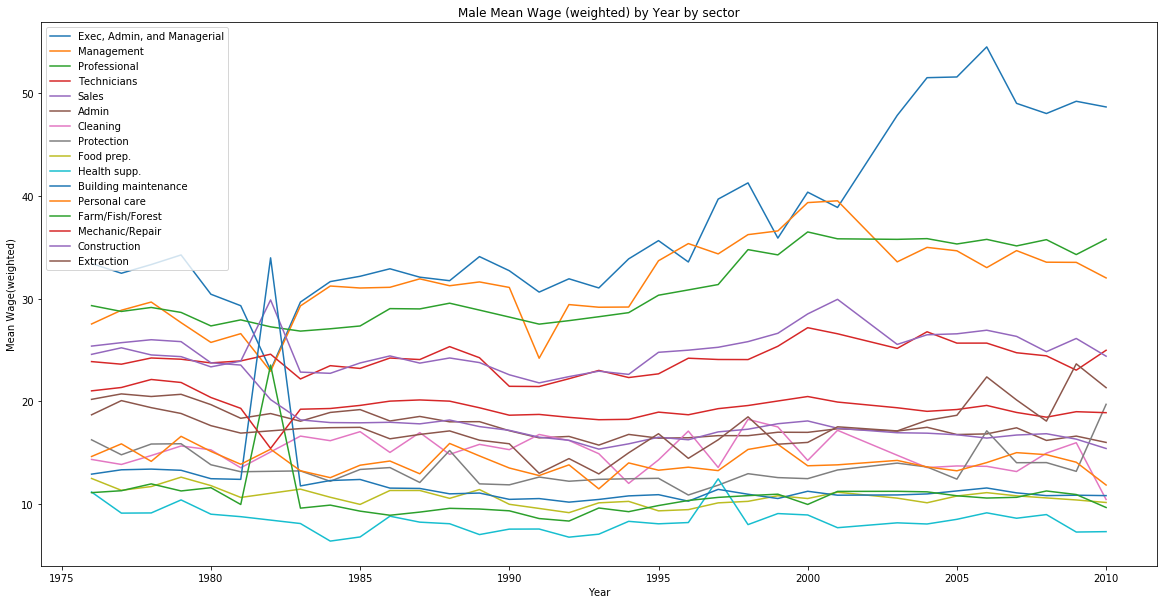

In [5]:
#One way of finding Mean wage (weighted) - ONE LINE
#import numpy One way of finding Mean wage (weighted)
df = df[df["Male"]==1]
grouped = df.groupby(['2digit occupation', "Year"])

arrays = []
for x in hf.index.values.tolist()[:-3]:
    for y in df.sort_values(by="Year")["Year"].unique():
        try:
            arrays.append(grouped.get_group((x, y))[["Year", "2digit occupation", "Asecwt", "Wage"]].to_numpy())
        except KeyError: pass
plt.figure(figsize=[20,10])
digit = 1.0
years = []
averages = []
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,0]
    two = array[0,1]
    average = np.average(values, weights=weights)
    if digit != two:
        plt.plot(years,averages, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        averages = []
    years.append(year)
    averages.append(average)
plt.plot(years,averages, label=hf.loc[digit]["occupation"])
plt.legend(loc=2)
plt.xlabel("Year")
plt.ylabel("Mean Wage(weighted)")
plt.title("Male Mean Wage (weighted) by Year by sector")
plt.savefig('../../../output/Graphs/Male/Male Mean Wage by Year by sector.png')

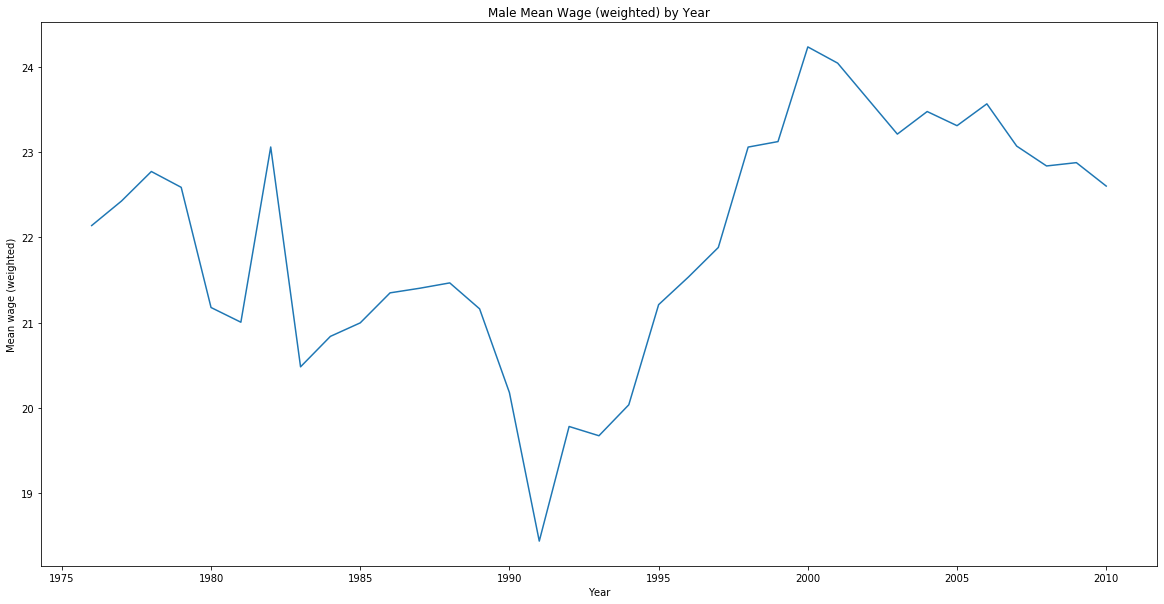

In [6]:
#https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
import numpy as np
df = df[df["Male"]==1]
grouped = df.groupby(["Year"])
arrays = []

for x in df.sort_values(by="Year")["Year"].unique():
    arrays.append(grouped.get_group((x))[["Year", "Asecwt", "Wage"]].to_numpy())

plt.figure(figsize=[20,10])
digit = 3.0
years = []
averages = []
for array in arrays:
    values = array[:,-1]
    weights = array[:,1]
    year = array[0,0]
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    years.append(year)
    averages.append(average)
plt.plot(years,averages)
plt.xlabel("Year")
plt.ylabel("Mean wage (weighted)")
plt.title("Male Mean Wage (weighted) by Year")
plt.savefig("../../../output/Graphs/Male/Male Mean Wage by Year.png")